In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df1=pd.read_excel("NobrokerBangalore data.xlsx")
df2=pd.read_excel('NobrokerHyderabad data.xlsx')

In [15]:
df1.rename(columns={0:'title',1:'location',2:'rent',3:'rent_type',4:'Deposite',5:'Sqft',6:'Furnish',7:'Apartment_type',8:'preferred_tenents',9:'Available_from'},inplace=True)
df2.rename(columns={0:'title',1:'location',2:'rent',3:'rent_type',4:'Deposite',5:'Sqft',6:'Furnish',7:'Apartment_type',8:'preferred_tenents',9:'Available_from'},inplace=True)

In [16]:
df=pd.merge(df1,df2,how='outer')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2597 non-null   int64 
 1   title              2597 non-null   object
 2   location           2597 non-null   object
 3   rent               2597 non-null   object
 4   rent_type          2597 non-null   object
 5   Deposite           2597 non-null   int64 
 6   Sqft               2597 non-null   object
 7   Furnish            2597 non-null   object
 8   Apartment_type     2597 non-null   object
 9   preferred_tenents  2597 non-null   object
 10  Available_from     2597 non-null   object
dtypes: int64(2), object(9)
memory usage: 223.3+ KB


In [18]:
df.drop(columns='Unnamed: 0',inplace=True)

In [19]:
df.rename(columns={'rent_type':'Negotiation'},inplace=True)

In [20]:
import re
def rent_or_lease(description):
    if re.search(r'\bRent\b', description):
        return "Rent"
    elif re.search(r'\bLease\b', description):
        return "Lease"
    else:
        return "Unknown"

In [21]:
df['rent_type']=df['title'].apply(rent_or_lease)

In [22]:
df['title']=df['title'].str.split('In')

In [23]:
df['City2']=df['title'].apply(lambda x:x[len(x)-1])

In [24]:
df['City']=df['City2'].str.split(' ').apply(lambda x:x[len(x)-1])

In [25]:
df.drop(columns={'City2','title'},inplace=True)

In [26]:
def splitting(data):
    if 'No Extra Maintenance' in data:
        x='No'
    else:
        x='yes'
    return x
df['Maintenance']=df['rent'].apply(splitting)

In [27]:
df.head()

,location,rent,Negotiation,Deposite,Sqft,Furnish,Apartment_type,preferred_tenents,Available_from,rent_type,City,Maintenance
0,"23rd Main, 18th Cross Rd, Nagaraja Garden, nea...",15000No Extra Maintenance,Non-Negotiable,100000,800 sqft,Semi Furnished,1 BHK,All,27-Nov-2024,Rent,Bangalore,No
1,"Standalone Building, BK Guda Near Naidu Gari...",13500No Extra Maintenance,Negotiable,13500,450 sqft,Unfurnished,1 BHK,Bachelor,Ready to Move,Rent,Hyderabad,No
2,"Panchadeep Colony near Reliance Fresh, Nand...",22000No Extra Maintenance,Non-Negotiable,220000,"1,200 sqft",Semi Furnished,2 BHK,Family,Ready to Move,Rent,Bangalore,No
3,"Sai Vaibhav Layout, Sai Aishwarya Layout, Chit...",43000No Extra Maintenance,Non-Negotiable,120000,"1,850 sqft",Semi Furnished,3 BHK,Family,Ready to Move,Rent,Hyderabad,No
4,"Aditya Nagar, near KHAJA HOTEL",13000 + 500Maintenance,Non-Negotiable,26000,650 sqft,Unfurnished,1 BHK,All,Ready to Move,Rent,Hyderabad,yes


In [28]:
df.head()

,location,rent,Negotiation,Deposite,Sqft,Furnish,Apartment_type,preferred_tenents,Available_from,rent_type,City,Maintenance
0,"23rd Main, 18th Cross Rd, Nagaraja Garden, nea...",15000No Extra Maintenance,Non-Negotiable,100000,800 sqft,Semi Furnished,1 BHK,All,27-Nov-2024,Rent,Bangalore,No
1,"Standalone Building, BK Guda Near Naidu Gari...",13500No Extra Maintenance,Negotiable,13500,450 sqft,Unfurnished,1 BHK,Bachelor,Ready to Move,Rent,Hyderabad,No
2,"Panchadeep Colony near Reliance Fresh, Nand...",22000No Extra Maintenance,Non-Negotiable,220000,"1,200 sqft",Semi Furnished,2 BHK,Family,Ready to Move,Rent,Bangalore,No
3,"Sai Vaibhav Layout, Sai Aishwarya Layout, Chit...",43000No Extra Maintenance,Non-Negotiable,120000,"1,850 sqft",Semi Furnished,3 BHK,Family,Ready to Move,Rent,Hyderabad,No
4,"Aditya Nagar, near KHAJA HOTEL",13000 + 500Maintenance,Non-Negotiable,26000,650 sqft,Unfurnished,1 BHK,All,Ready to Move,Rent,Hyderabad,yes


In [29]:
def maintancene(data):
    if "No Extra Maintenance" in data:
        data=data.replace('No Extra Maintenance','')
    elif 'Maintenance' in data:
        data=data.replace('Maintenance','')
    else:
        data=data
    return data

In [30]:
df['rent']=df['rent'].apply(maintancene)

In [31]:
def maintancene(data):
    if '+' in data:
        x=data.split('+')[-1]
    else:
        x=0
    return x

In [32]:
df['Maintenance_amount']=df['rent'].apply(maintancene)

In [33]:
df.head()

,location,rent,Negotiation,Deposite,Sqft,Furnish,Apartment_type,preferred_tenents,Available_from,rent_type,City,Maintenance,Maintenance_amount
0,"23rd Main, 18th Cross Rd, Nagaraja Garden, nea...",15000,Non-Negotiable,100000,800 sqft,Semi Furnished,1 BHK,All,27-Nov-2024,Rent,Bangalore,No,0
1,"Standalone Building, BK Guda Near Naidu Gari...",13500,Negotiable,13500,450 sqft,Unfurnished,1 BHK,Bachelor,Ready to Move,Rent,Hyderabad,No,0
2,"Panchadeep Colony near Reliance Fresh, Nand...",22000,Non-Negotiable,220000,"1,200 sqft",Semi Furnished,2 BHK,Family,Ready to Move,Rent,Bangalore,No,0
3,"Sai Vaibhav Layout, Sai Aishwarya Layout, Chit...",43000,Non-Negotiable,120000,"1,850 sqft",Semi Furnished,3 BHK,Family,Ready to Move,Rent,Hyderabad,No,0
4,"Aditya Nagar, near KHAJA HOTEL",13000 + 500,Non-Negotiable,26000,650 sqft,Unfurnished,1 BHK,All,Ready to Move,Rent,Hyderabad,yes,500


In [34]:
def maintenance1(data):
    if '+' in data:
        x=data.split('+')[0]
    else:
        x=data
    return x

In [35]:
df['rent']=df['rent'].apply(maintenance1)

In [36]:
df.head()

,location,rent,Negotiation,Deposite,Sqft,Furnish,Apartment_type,preferred_tenents,Available_from,rent_type,City,Maintenance,Maintenance_amount
0,"23rd Main, 18th Cross Rd, Nagaraja Garden, nea...",15000,Non-Negotiable,100000,800 sqft,Semi Furnished,1 BHK,All,27-Nov-2024,Rent,Bangalore,No,0
1,"Standalone Building, BK Guda Near Naidu Gari...",13500,Negotiable,13500,450 sqft,Unfurnished,1 BHK,Bachelor,Ready to Move,Rent,Hyderabad,No,0
2,"Panchadeep Colony near Reliance Fresh, Nand...",22000,Non-Negotiable,220000,"1,200 sqft",Semi Furnished,2 BHK,Family,Ready to Move,Rent,Bangalore,No,0
3,"Sai Vaibhav Layout, Sai Aishwarya Layout, Chit...",43000,Non-Negotiable,120000,"1,850 sqft",Semi Furnished,3 BHK,Family,Ready to Move,Rent,Hyderabad,No,0
4,"Aditya Nagar, near KHAJA HOTEL",13000,Non-Negotiable,26000,650 sqft,Unfurnished,1 BHK,All,Ready to Move,Rent,Hyderabad,yes,500


In [37]:
df=df[['Apartment_type','location','City','rent_type','rent','Deposite','Maintenance','Maintenance_amount','Negotiation','Sqft','Furnish','preferred_tenents','Available_from']]

In [38]:
df.rename(columns={'rant_type':'rent_type'},inplace=True)

In [39]:
df.drop(columns=['location'],inplace=True)

In [40]:
df.head()

,Apartment_type,City,rent_type,rent,Deposite,Maintenance,Maintenance_amount,Negotiation,Sqft,Furnish,preferred_tenents,Available_from
0,1 BHK,Bangalore,Rent,15000,100000,No,0,Non-Negotiable,800 sqft,Semi Furnished,All,27-Nov-2024
1,1 BHK,Hyderabad,Rent,13500,13500,No,0,Negotiable,450 sqft,Unfurnished,Bachelor,Ready to Move
2,2 BHK,Bangalore,Rent,22000,220000,No,0,Non-Negotiable,"1,200 sqft",Semi Furnished,Family,Ready to Move
3,3 BHK,Hyderabad,Rent,43000,120000,No,0,Non-Negotiable,"1,850 sqft",Semi Furnished,Family,Ready to Move
4,1 BHK,Hyderabad,Rent,13000,26000,yes,500,Non-Negotiable,650 sqft,Unfurnished,All,Ready to Move


In [41]:
df['Sqft']=df['Sqft'].str.replace('sqft','')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Apartment_type      2597 non-null   object
 1   City                2597 non-null   object
 2   rent_type           2597 non-null   object
 3   rent                2597 non-null   object
 4   Deposite            2597 non-null   int64 
 5   Maintenance         2597 non-null   object
 6   Maintenance_amount  2597 non-null   object
 7   Negotiation         2597 non-null   object
 8   Sqft                2597 non-null   object
 9   Furnish             2597 non-null   object
 10  preferred_tenents   2597 non-null   object
 11  Available_from      2597 non-null   object
dtypes: int64(1), object(11)
memory usage: 243.6+ KB


In [43]:
df=df[df['rent_type']!='Lease']

In [44]:
df['Sqft']=df['Sqft'].str.replace(',','')


In [45]:
col=['rent','Maintenance_amount','Sqft']
for i in col:
    df[i]=df[i].astype('int64')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2572 entries, 0 to 2596
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Apartment_type      2572 non-null   object
 1   City                2572 non-null   object
 2   rent_type           2572 non-null   object
 3   rent                2572 non-null   int64 
 4   Deposite            2572 non-null   int64 
 5   Maintenance         2572 non-null   object
 6   Maintenance_amount  2572 non-null   int64 
 7   Negotiation         2572 non-null   object
 8   Sqft                2572 non-null   int64 
 9   Furnish             2572 non-null   object
 10  preferred_tenents   2572 non-null   object
 11  Available_from      2572 non-null   object
dtypes: int64(4), object(8)
memory usage: 261.2+ KB


In [47]:
df.duplicated().sum()

np.int64(324)

In [48]:
df.drop_duplicates(inplace=True)

In [49]:
pd.crosstab(index=df['Apartment_type'],columns=df['City'],values=df['rent'],aggfunc={'count','mean'})

count                    mean               
City           Bangalore Hyderabad     Bangalore      Hyderabad
Apartment_type                                                 
1 BHK              235.0     194.0  15312.340426   10776.793814
1 RK                47.0      73.0   9731.914894    8660.273973
2 BHK              589.0     475.0  29070.144312   19181.892632
3 BHK              292.0     325.0  44489.041096   37614.461538
4 BHK                6.0       8.0  65333.333333  118750.000000
4+ BHK               NaN       4.0           NaN  382500.000000

In [50]:
df.drop(columns=['rent_type'],inplace=True)

In [51]:
num_col=df.select_dtypes(include='number').columns
cat_col=df.select_dtypes(include='object').columns

In [52]:
df['monthly_payable_amount']=df['rent']+df['Maintenance_amount']

# Univariate Analysis

***** rent *****


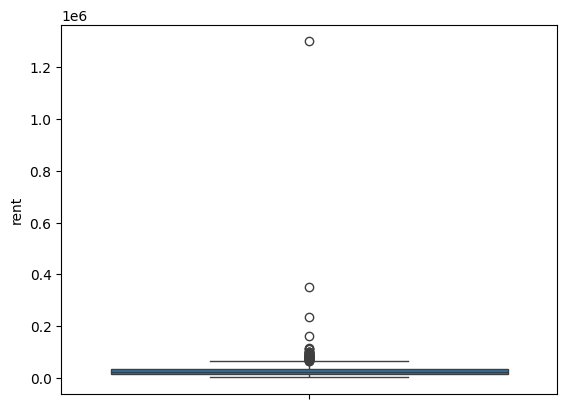

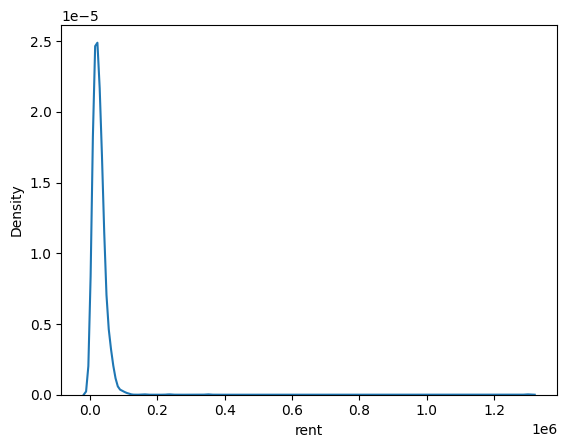

***** Deposite *****


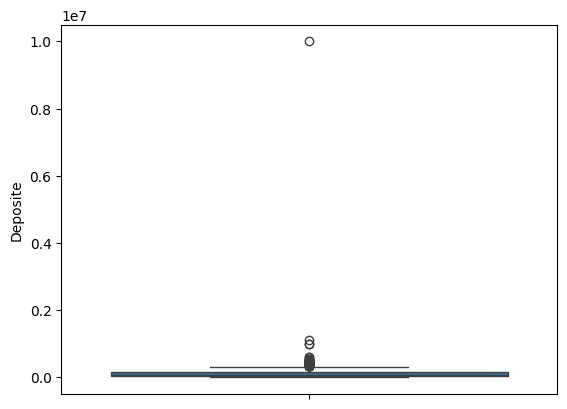

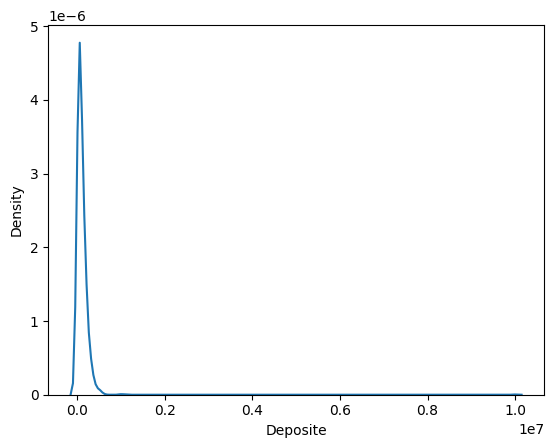

***** Maintenance_amount *****


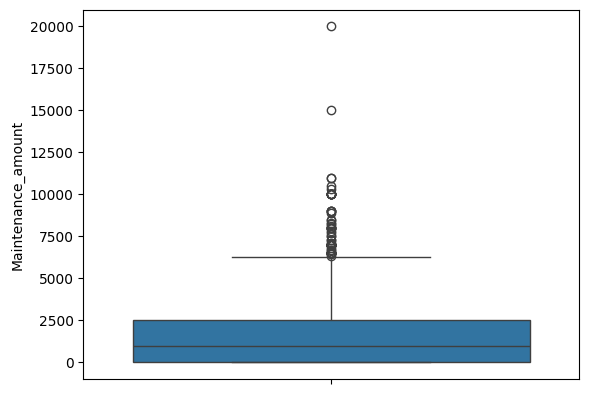

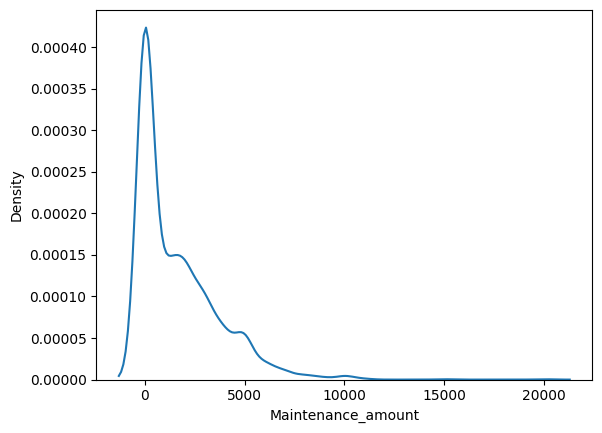

***** Sqft *****


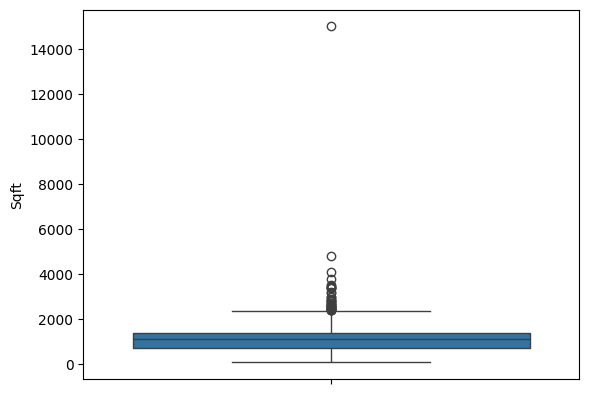

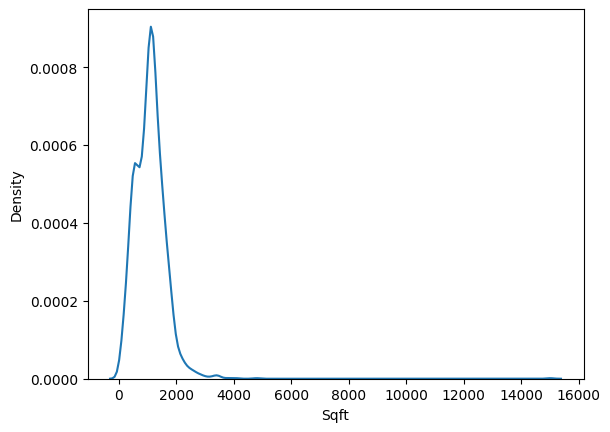

In [53]:
for col in num_col:
    print('*'*5,col,'*'*5)
    sns.boxplot(df[col])
    plt.show()
    sns.kdeplot(df[col])
    plt.show()

There are one or two outliers in each column so we are removing those from the data

In [54]:
df=df[df['rent']<=350000]

In [55]:
df=df[df['Deposite']<10000000]

In [56]:
df=df[df['Sqft']<15000]

In [57]:
df=df[df['rent']<350000]

In [58]:
df=df[df['monthly_payable_amount']<245000]

In [59]:
cat_col=cat_col[0:len(cat_col)-1]
cat_col

Index(['Apartment_type', 'City', 'Maintenance', 'Negotiation', 'Furnish',
       'preferred_tenents'],
      dtype='object')

In [60]:
def preferred(x):
    others=["Family","All","Company","Bachelor","Male","Female"]
    if x not in others:
        x='others'
    else:
        x=x
    return x
df['preferred_tenents']=df['preferred_tenents'].apply(preferred)

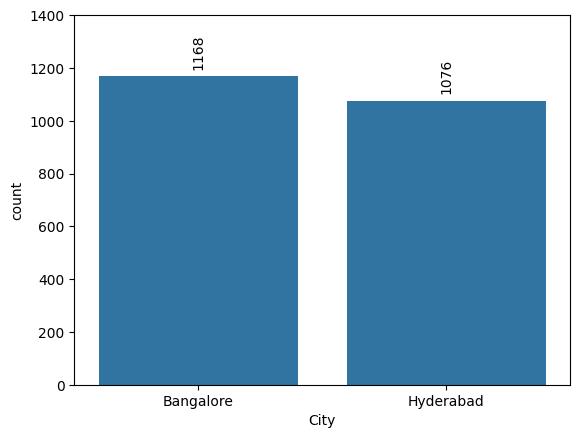

In [61]:
ax=sns.barplot(x=df['City'].value_counts().index,y=df['City'].value_counts())
for container in ax.containers:
    ax.bar_label(container, fontsize=10, rotation=90, padding=5)
ax.set_ylim(0,1400)
plt.show()

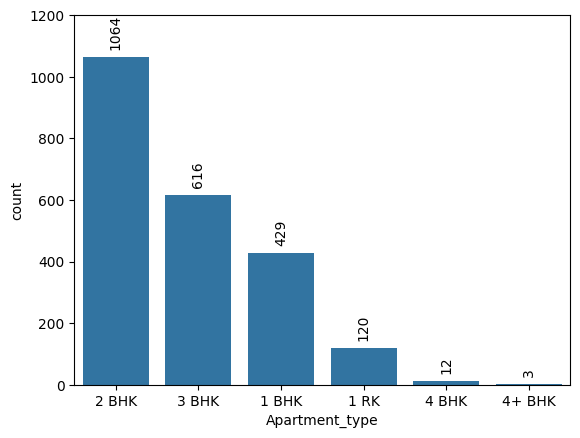

In [62]:
ax=sns.barplot(x=df['Apartment_type'].value_counts().index,y=df['Apartment_type'].value_counts())
for container in ax.containers:
    ax.bar_label(container, fontsize=10, rotation=90, padding=5)
ax.set_ylim(0,1200)
plt.show()

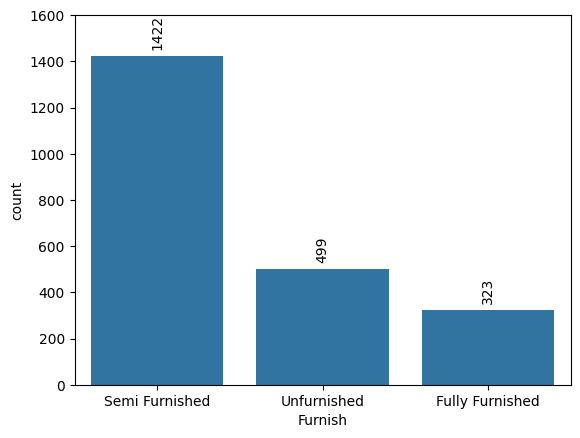

In [63]:
ax=sns.barplot(x=df['Furnish'].value_counts().index,y=df['Furnish'].value_counts())
for container in ax.containers:
    ax.bar_label(container, fontsize=10, rotation=90, padding=5)
ax.set_ylim(0,1600)
plt.show()

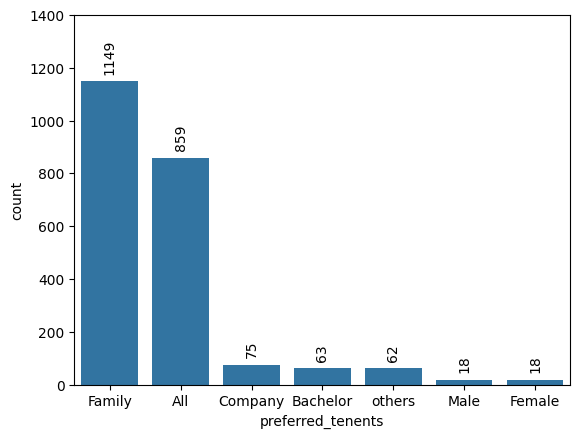

In [64]:
ax=sns.barplot(x=df['preferred_tenents'].value_counts().index,y=df['preferred_tenents'].value_counts())
for container in ax.containers:
    ax.bar_label(container, fontsize=10, rotation=90, padding=5)
ax.set_ylim(0,1400)
plt.show()

In [65]:
num_col=df.select_dtypes(include='number').columns
num_col=num_col[0:-1]
num_col

Index(['rent', 'Deposite', 'Maintenance_amount', 'Sqft'], dtype='object')

<Axes: >

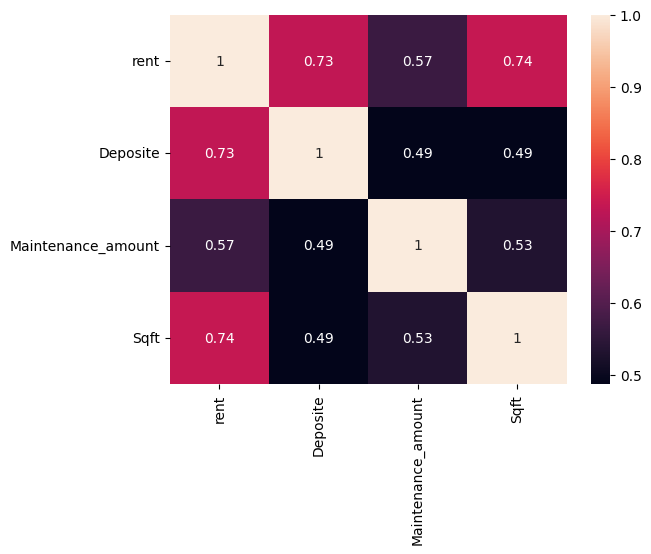

In [66]:
sns.heatmap(df[num_col].corr(),annot=True)

In [67]:
g=df.groupby(['City'])['Apartment_type'].value_counts().reset_index()
g

,City,Apartment_type,count
0,Bangalore,2 BHK,589
1,Bangalore,3 BHK,291
2,Bangalore,1 BHK,235
3,Bangalore,1 RK,47
4,Bangalore,4 BHK,6
5,Hyderabad,2 BHK,475
6,Hyderabad,3 BHK,325
7,Hyderabad,1 BHK,194
8,Hyderabad,1 RK,73
9,Hyderabad,4 BHK,6


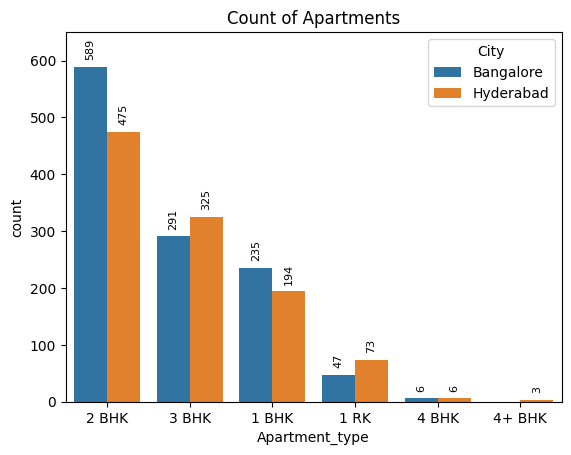

In [68]:
ax=sns.barplot(data=g,x='Apartment_type',y='count',hue='City')
for container in ax.containers:
    ax.bar_label(container,fontsize=8,rotation=90,padding=5)
ax.set_ylim(0,650)
plt.title('Count of Apartments')
plt.show()

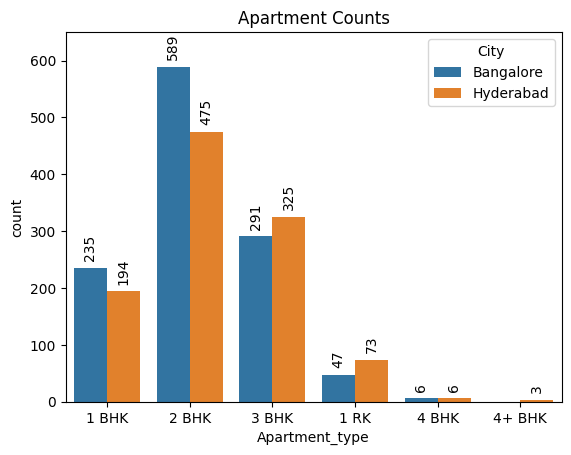

In [69]:
ax=sns.countplot(x='Apartment_type',hue='City',data=df)
for container in ax.containers:
    ax.bar_label(container, fontsize=10, rotation=90, padding=5)
ax.set_ylim(0,650)
plt.title('Apartment Counts')
plt.show()


In [70]:
g=pd.pivot_table(index='City',columns='Apartment_type',values='rent',aggfunc={'min',"max","mean"},data=df)

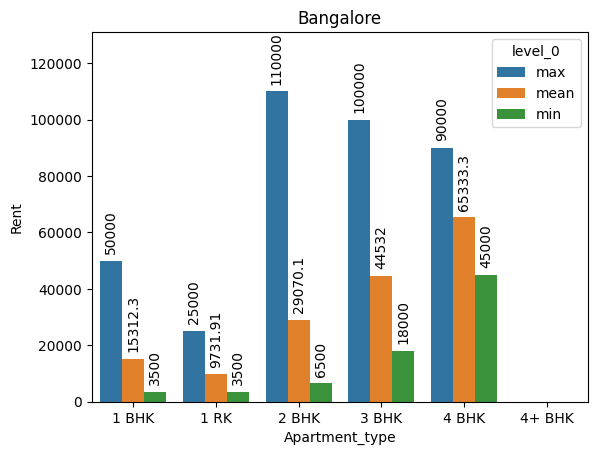

In [71]:
x=g.iloc[0].reset_index()
x
ax = sns.barplot(data=x,x='Apartment_type',y='Bangalore',hue='level_0')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, rotation=90, padding=5)
plt.title('Bangalore') 
plt.ylabel('Rent')
ax.set_ylim(0, 131000)
plt.show()

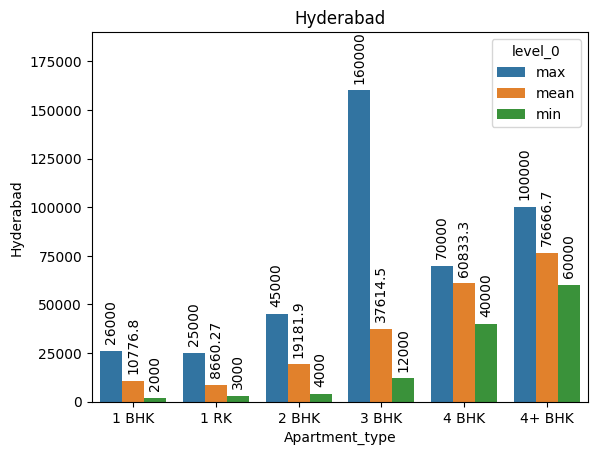

In [72]:
x=g.iloc[1].reset_index()
x
ax = sns.barplot(data=x,x='Apartment_type',y='Hyderabad',hue='level_0')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, rotation=90, padding=5)
ax.set_ylim(0, 190000)
plt.title("Hyderabad")
plt.show()


In [73]:
g=pd.pivot_table(index='City',columns='Apartment_type',values='Sqft',aggfunc={'min',"max","mean"},data=df)

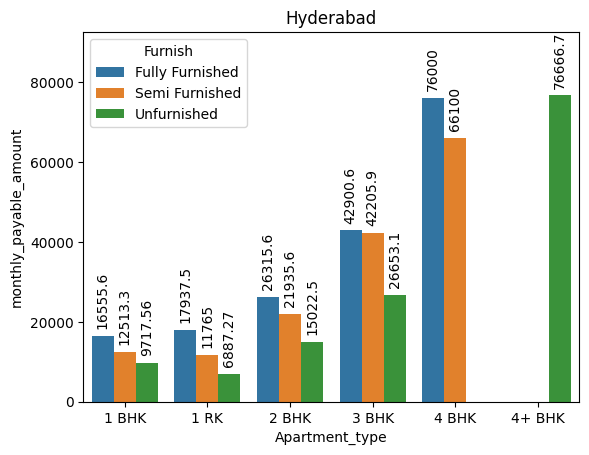

In [74]:
g=df[df['City']=='Hyderabad'].groupby(['Apartment_type','Furnish'])['monthly_payable_amount'].mean().reset_index()
ax = sns.barplot(data=g,x='Apartment_type',y='monthly_payable_amount',hue='Furnish')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, rotation=90, padding=5)
ax.set_ylim(0, 92500)
plt.title("Hyderabad")
plt.show()

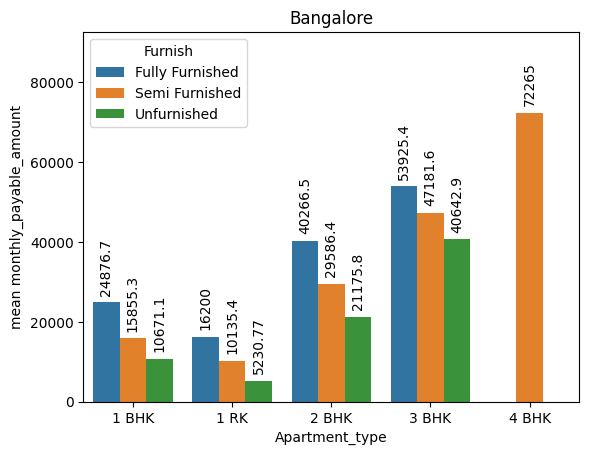

In [75]:
g=df[df['City']=='Bangalore'].groupby(['Apartment_type','Furnish'])['monthly_payable_amount'].mean().reset_index()
ax = sns.barplot(data=g,x='Apartment_type',y='monthly_payable_amount',hue='Furnish')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, rotation=90, padding=5)
ax.set_ylim(0, 92500)
plt.title("Bangalore")
plt.ylabel('mean monthly_payable_amount')
plt.show()

In [76]:
"""ax = sns.barplot(data=g,x='Apartment_type',y='City')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, rotation=90, padding=5)
plt.title("mean Sqft")
plt.show()
"""

'ax = sns.barplot(data=g,x=\'Apartment_type\',y=\'City\')\nfor container in ax.containers:\n    ax.bar_label(container, fontsize=10, rotation=90, padding=5)\nplt.title("mean Sqft")\nplt.show()\n'

In [77]:
g=pd.pivot_table(index='City',columns='Apartment_type',values='Sqft',aggfunc={'min',"max","mean"},data=df)
g

max                                               mean  \
Apartment_type   1 BHK   1 RK   2 BHK   3 BHK   4 BHK  4+ BHK       1 BHK   
City                                                                        
Bangalore       1200.0  700.0  2000.0  2820.0  3800.0     NaN  548.651064   
Hyderabad       1200.0  900.0  2700.0  4800.0  3380.0  3174.0  563.798969   

                                                                   \
Apartment_type        1 RK        2 BHK        3 BHK        4 BHK   
City                                                                
Bangalore       283.936170  1060.020374  1563.274914  2321.333333   
Hyderabad       263.835616  1061.105263  1675.553846  2590.000000   

                               min                                       
Apartment_type       4+ BHK  1 BHK   1 RK  2 BHK  3 BHK   4 BHK  4+ BHK  
City                                                                     
Bangalore               NaN  200.0  100.0  450.0  900.0  1544.0     NaN  
Hyderabad       2491.333333  275.0   80.0  450.0  850.0  1100.0  1600.0

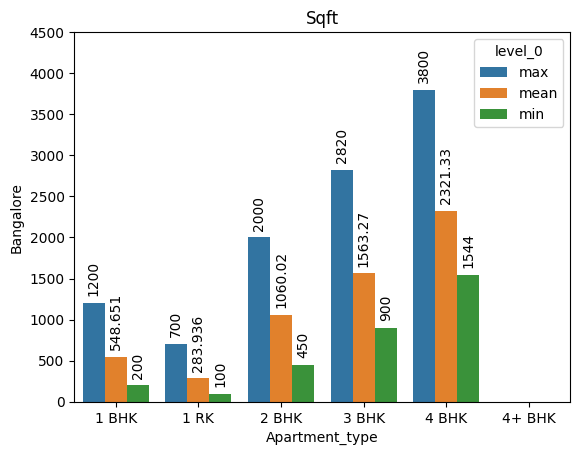

In [78]:
x=g.iloc[0].reset_index()
x
ax = sns.barplot(data=x,x='Apartment_type',y='Bangalore',hue='level_0')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, rotation=90, padding=5)
plt.title('Sqft') 
ax.set_ylim(0, 4500)
plt.show()

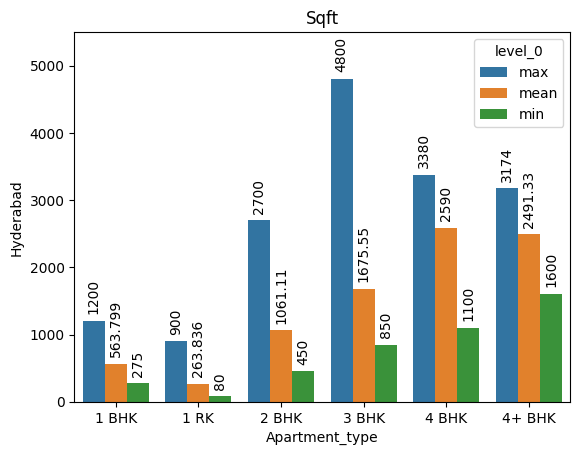

In [79]:
x=g.iloc[1].reset_index()
x
ax = sns.barplot(data=x,x='Apartment_type',y='Hyderabad',hue='level_0')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, rotation=90, padding=5)
plt.title('Sqft') 
ax.set_ylim(0, 5500)
plt.show()

In [80]:
df.head()

,Apartment_type,City,rent,Deposite,Maintenance,Maintenance_amount,Negotiation,Sqft,Furnish,preferred_tenents,Available_from,monthly_payable_amount
0,1 BHK,Bangalore,15000,100000,No,0,Non-Negotiable,800,Semi Furnished,All,27-Nov-2024,15000
1,1 BHK,Hyderabad,13500,13500,No,0,Negotiable,450,Unfurnished,Bachelor,Ready to Move,13500
2,2 BHK,Bangalore,22000,220000,No,0,Non-Negotiable,1200,Semi Furnished,Family,Ready to Move,22000
3,3 BHK,Hyderabad,43000,120000,No,0,Non-Negotiable,1850,Semi Furnished,Family,Ready to Move,43000
4,1 BHK,Hyderabad,13000,26000,yes,500,Non-Negotiable,650,Unfurnished,All,Ready to Move,13500


In [81]:
#is there any difference in the rent between among both the cities

In [82]:
import scipy.stats as stats

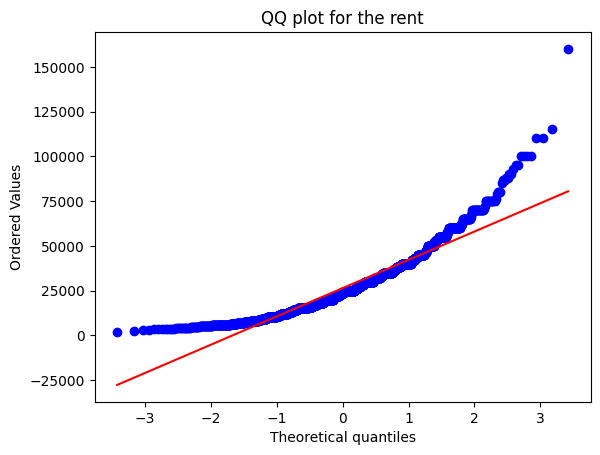

In [83]:
stats.probplot(df['rent'],dist='norm',plot=plt)
plt.title('QQ plot for the rent')
plt.show()

In [84]:
stats,p_val=stats.mannwhitneyu(df[df['City']=='Bangalore']['rent'],df[df['City']=='Hyderabad']['rent'])
print('p value',p_val)

p value 4.330973311792472e-33


In [85]:
df.columns

Index(['Apartment_type', 'City', 'rent', 'Deposite', 'Maintenance',
       'Maintenance_amount', 'Negotiation', 'Sqft', 'Furnish',
       'preferred_tenents', 'Available_from', 'monthly_payable_amount'],
      dtype='object')

# it will convert any type of data to normal

In [94]:
#from sklearn.preprocessing import QuantileTransformer
#qt=QuantileTransformer(output_distribution='normal',random_state=5)
#df['rent_transformed']=qt.fit_transform(df[['rent']])

In [87]:
df['Available_from'] = pd.to_datetime(df['Available_from'], errors='coerce')

In [88]:
apt_type_summary = df[df['City']=='Bangalore'].groupby('Apartment_type')[['rent', 'Deposite', 'Sqft']].mean().reset_index()
apt_type_summary

,Apartment_type,rent,Deposite,Sqft
0,1 BHK,15312.340426,71923.404255,548.651064
1,1 RK,9731.914894,38851.063830,283.936170
2,2 BHK,29070.144312,152317.487267,1060.020374
3,3 BHK,44531.958763,239386.597938,1563.274914
4,4 BHK,65333.333333,340000.000000,2321.333333


<Figure size 800x600 with 0 Axes>

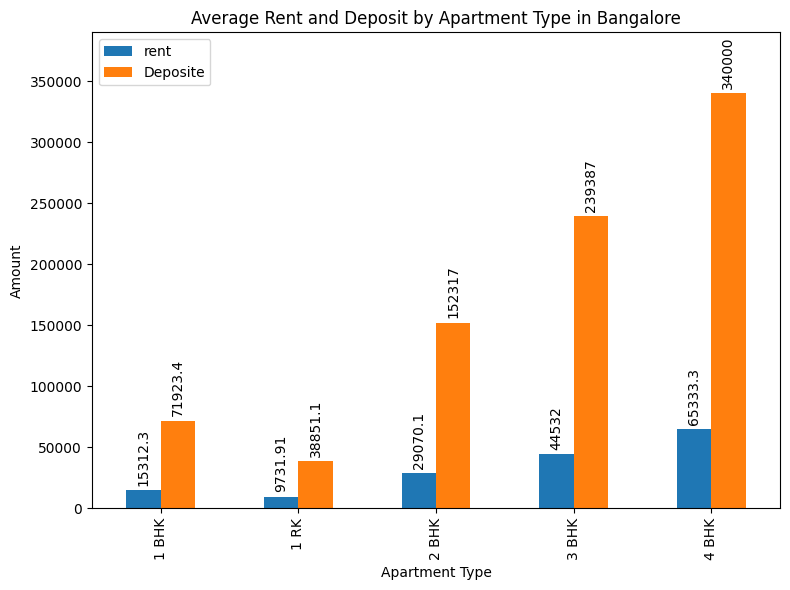

In [89]:
import matplotlib.pyplot as plt

apt_type_summary = df[df['City']=='Bangalore'].groupby('Apartment_type')[['rent', 'Deposite', 'Sqft']].mean().reset_index()

plt.figure(figsize=(8, 6))
ax = apt_type_summary.plot(x='Apartment_type', y=['rent', 'Deposite'], kind='bar', figsize=(8, 6), title="Average Rent and Deposit by Apartment Type in Bangalore")

plt.ylim(0,390000)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, rotation=90)
plt.xlabel('Apartment Type')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

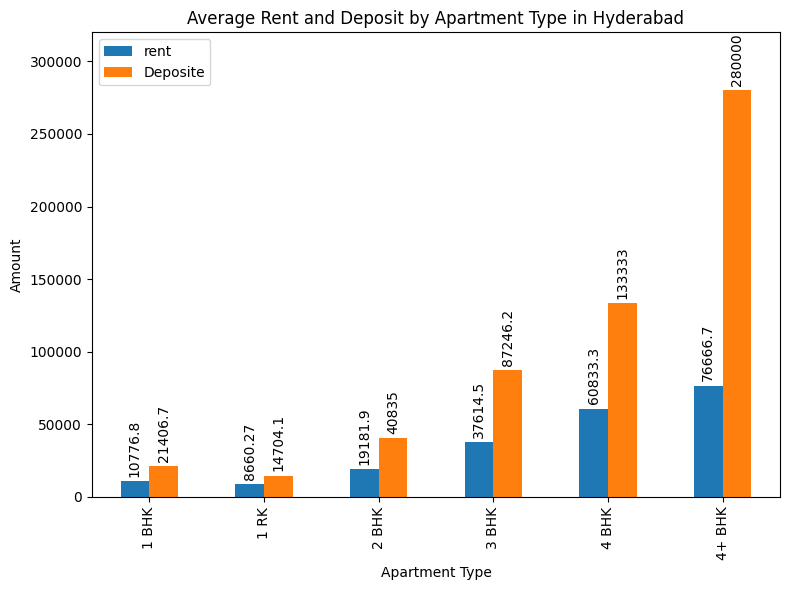

In [90]:
import matplotlib.pyplot as plt

apt_type_summary = df[df['City']=='Hyderabad'].groupby('Apartment_type')[['rent', 'Deposite', 'Sqft']].mean().reset_index()

plt.figure(figsize=(8, 6))
ax = apt_type_summary.plot(x='Apartment_type', y=['rent', 'Deposite'], kind='bar', figsize=(8, 6), title="Average Rent and Deposit by Apartment Type in Hyderabad")

plt.ylim(0,320000)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, rotation=90)
plt.xlabel('Apartment Type')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

<Axes: xlabel='rent', ylabel='Sqft'>

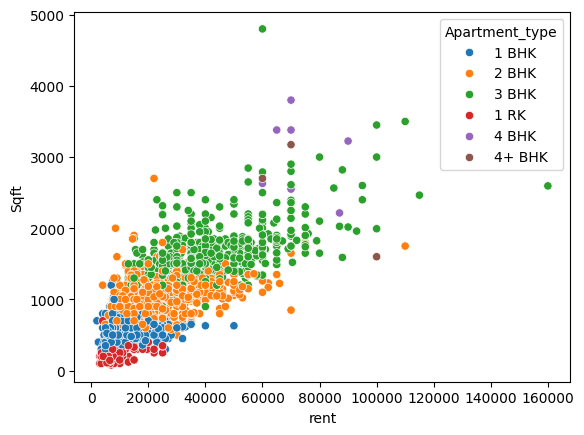

In [91]:
sns.scatterplot(x=df['rent'],y=df['Sqft'],hue=df['Apartment_type'])

In [92]:
df.groupby('Apartment_type')['rent'].mean()

Apartment_type
1 BHK     13261.300699
1 RK       9080.000000
2 BHK     24655.746241
3 BHK     40882.305195
4 BHK     63083.333333
4+ BHK    76666.666667
Name: rent, dtype: float64

<Axes: xlabel='Apartment_type', ylabel='rent'>

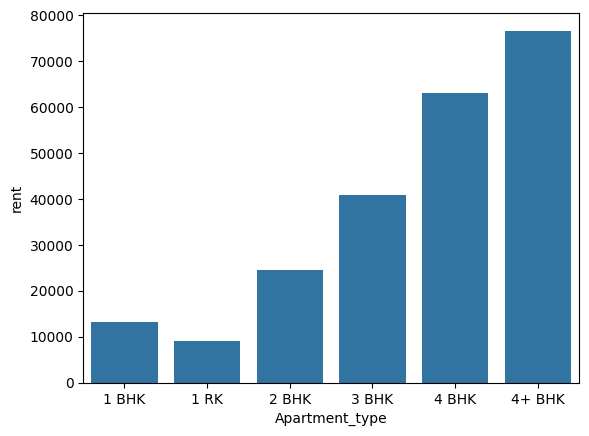

In [93]:
sns.barplot(df.groupby('Apartment_type')['rent'].mean())

In [99]:
df[df['City']=='Bangalore']['rent'].mean()

np.float64(29562.427226027397)

In [101]:
df[df['City']=='Hyderabad']['rent'].mean()


np.float64(22912.636617100372)